COMP 534 Assignment 1


Indicate the imported packages/libraries

In [224]:
import pandas as pd                                      # Import pandas for data manipulation
import numpy as np                                       # Import numpy for numerical operations
import seaborn as sns                                    # Import seaborn for data visualization
import matplotlib.pyplot as plt                          # Import matplotlib for plotting
from sklearn.model_selection import train_test_split     # Import train_test_split for splitting data
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import DecisionTreeClassifier and plot_tree for decision trees
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import evaluation metrics
from sklearn.model_selection import cross_validate, cross_val_score  # Import cross-validation methods
from sklearn.metrics import confusion_matrix, classification_report   # Import confusion matrix and classification report
from sklearn.neighbors import KNeighborsClassifier      # Import KNeighborsClassifier for KNN
from sklearn.svm import SVC                              # Import SVC for Support Vector Classifier
from sklearn.model_selection import GridSearchCV         # Import GridSearchCV for hyperparameter tuning
from sklearn.decomposition import PCA                    # Import PCA for dimensionality reduction


Load the dataset and print the data information

In [225]:
# Read the CSV file into a DataFrame
data = pd.read_csv('dataset_assignment1.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the data:")
print(data.head(5))

# Print information about the data
print("Data Information:")
print(data.info())


First 5 rows of the data:
   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0         5         1         1         1         2         1         3   
1         5         4         4         5         7        10         3   
2         3         1         1         1         2         2         3   
3         6         8         8         1         3         4         3   
4         4         1         1         3         2         1         3   

   feature8  feature9  class  
0         1         1      0  
1         2         1      0  
2         1         1      0  
3         7         1      0  
4         1         1      0  
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null  


Print-out the number of samples for each class in the dataset


In [226]:
# Count the number of samples for each class in the 'class' column
class_counts = data['class'].value_counts()

# Print the number of samples for each class
print("Number of samples for each class:")
print(class_counts)


Number of samples for each class:
class
0    459
1    241
Name: count, dtype: int64


Plot some figures to visualize the data

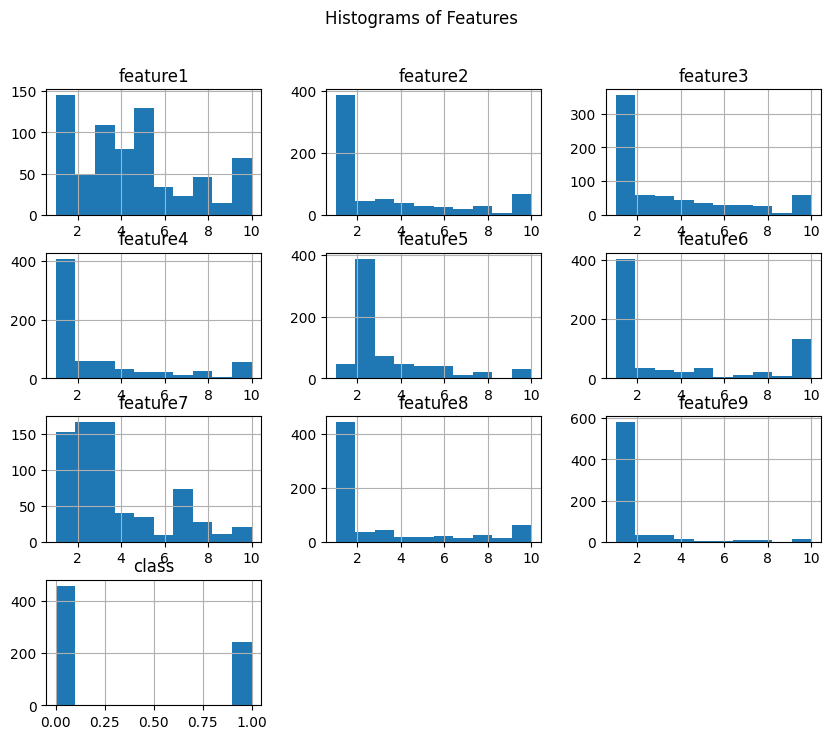

<Figure size 1000x800 with 0 Axes>

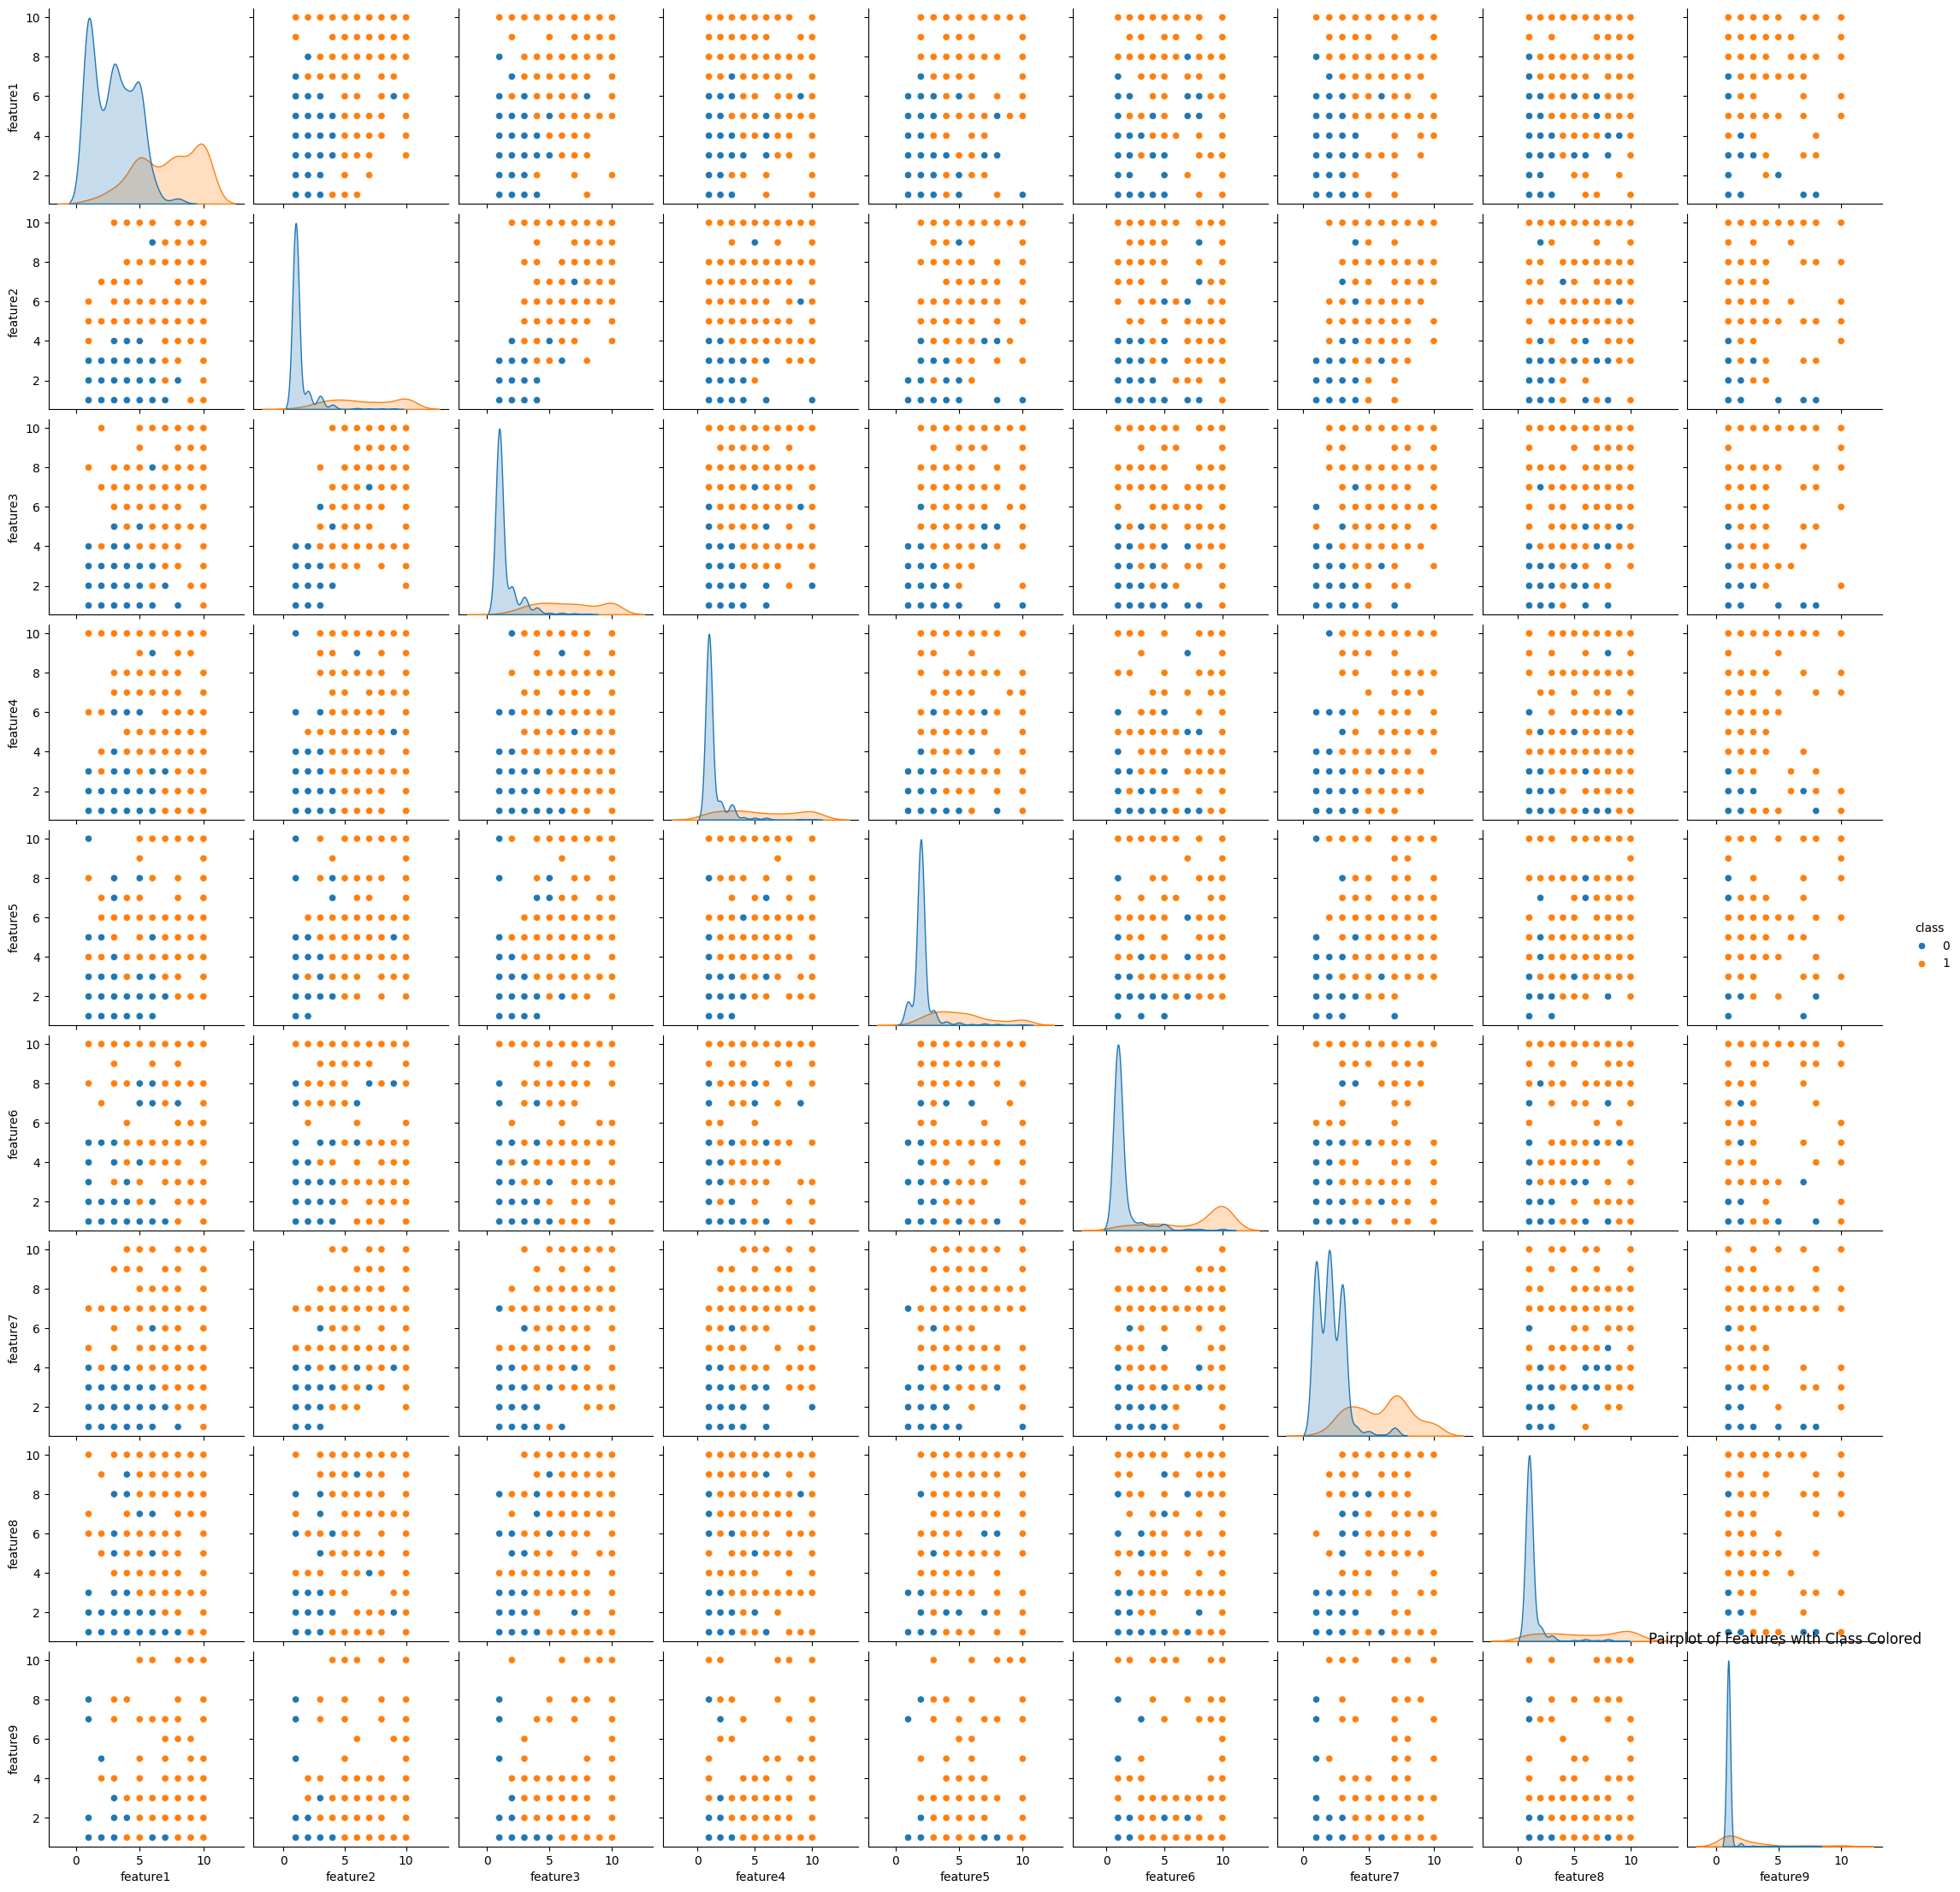

In [227]:
# Histograms
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()

# Scatter plots (pairplot)
plt.figure(figsize=(10, 8))
sns.pairplot(data=data, hue='class')
plt.title("Pairplot of Features with Class Colored")
plt.show()

In [228]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          feature1  feature2  feature3  feature4  feature5  feature6  \
feature1  1.000000  0.645074  0.654747  0.486584  0.522005  0.584868   
feature2  0.645074  1.000000  0.906950  0.705766  0.751923  0.684836   
feature3  0.654747  0.906950  1.000000  0.683286  0.719813  0.706412   
feature4  0.486584  0.705766  0.683286  1.000000  0.599795  0.664985   
feature5  0.522005  0.751923  0.719813  0.599795  1.000000  0.580816   
feature6  0.584868  0.684836  0.706412  0.664985  0.580816  1.000000   
feature7  0.558443  0.755619  0.735832  0.666672  0.616096  0.675110   
feature8  0.536034  0.723030  0.719620  0.603572  0.629057  0.578442   
feature9  0.350188  0.458838  0.439066  0.417789  0.479228  0.336234   
class     0.716124  0.818035  0.819073  0.696995  0.682950  0.810058   

          feature7  feature8  feature9     class  
feature1  0.558443  0.536034  0.350188  0.716124  
feature2  0.755619  0.723030  0.458838  0.818035  
feature3  0.735832  0.719620  0.43

For each class, print-out the statistical description of features

In [229]:
# Iterate over unique class labels in the 'class' column of the DataFrame
for class_label in data['class'].unique():

    # Print statistical description of features for the current class label
    print(f"\nStatistical description of features for Class {class_label}:")

    # Filter data for the current class label and drop the 'class' column
    class_data = data[data['class'] == class_label].drop(columns=['class'])
    
    # Print the descriptive statistics for the features of the current class
    print(class_data.describe())



Statistical description of features for Class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  


Randomly split data into a training dataset and a testing dataset (i.e., 80% vs 20%)

In [230]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['class'])
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (560, 9) (560,)
Testing set shape (X, y): (140, 9) (140,)


Train the model using the training data

DECISION TREE CLASSIFICATION

In [231]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9285714285714286
Confusion Matrix:
[[91  3]
 [ 7 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        94
           1       0.93      0.85      0.89        46

    accuracy                           0.93       140
   macro avg       0.93      0.91      0.92       140
weighted avg       0.93      0.93      0.93       140



In [232]:
# Define the range of hyperparameters to search over
params = {'max_depth': np.arange(1, 11)}

# Initialize a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define evaluation metrics to track during cross-validation
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

# Perform K-Fold Cross Validation to tune hyperparameters and evaluate model performance
results = {}
for max_depth in params['max_depth']:
    decision_tree.set_params(max_depth=max_depth)
    cv_results = cross_validate(decision_tree, X_train, y_train, cv=10, scoring=scoring)
    avg_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}
    results[max_depth] = avg_scores

# Print evaluation metrics for each hyperparameter setting
for max_depth, scores in results.items():
    print(f"Max Depth: {max_depth}, Avg Scores: {scores}")

# Select the best hyperparameters based on the evaluation metrics
best_hyperparameters = max(results, key=lambda k: results[k]['f1'])
print("Best Hyperparameters:", {'max_depth': best_hyperparameters})

# Train the model using the best hyperparameters found
best_max_depth = {'max_depth': best_hyperparameters}
decision_tree.set_params(**best_max_depth)
decision_tree.fit(X_train, y_train)

# Test the model on the testing dataset
y_pred_test = decision_tree.predict(X_test)


Max Depth: 1, Avg Scores: {'accuracy': 0.9089285714285713, 'precision': 0.9128237629133411, 'recall': 0.9089285714285713, 'f1': 0.9082187388953413}
Max Depth: 2, Avg Scores: {'accuracy': 0.9357142857142857, 'precision': 0.9376645622292388, 'recall': 0.9357142857142857, 'f1': 0.9356882700574742}
Max Depth: 3, Avg Scores: {'accuracy': 0.9464285714285714, 'precision': 0.9486075056881669, 'recall': 0.9464285714285714, 'f1': 0.9466988102130396}
Max Depth: 4, Avg Scores: {'accuracy': 0.9285714285714286, 'precision': 0.9296831447971016, 'recall': 0.9285714285714286, 'f1': 0.9278282124128762}
Max Depth: 5, Avg Scores: {'accuracy': 0.9446428571428571, 'precision': 0.9450048544785385, 'recall': 0.9446428571428571, 'f1': 0.9444583155037071}
Max Depth: 6, Avg Scores: {'accuracy': 0.9375, 'precision': 0.9385601990616366, 'recall': 0.9375, 'f1': 0.937351514765924}
Max Depth: 7, Avg Scores: {'accuracy': 0.9375, 'precision': 0.9384296982909683, 'recall': 0.9375, 'f1': 0.9374241190057102}
Max Depth: 8,

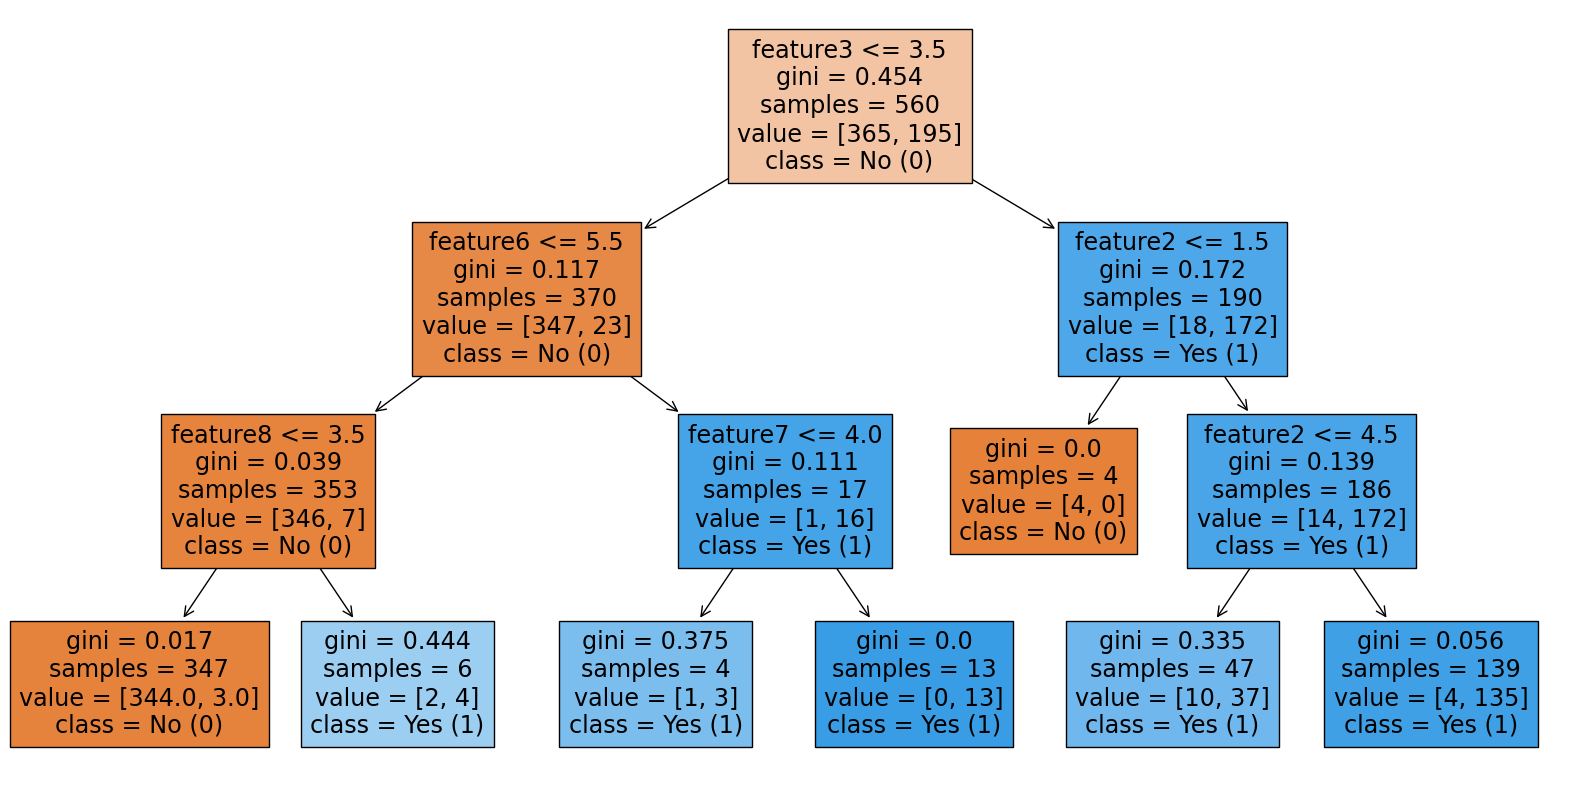

In [233]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["No (0)", "Yes (1)"], filled=True)
plt.show()

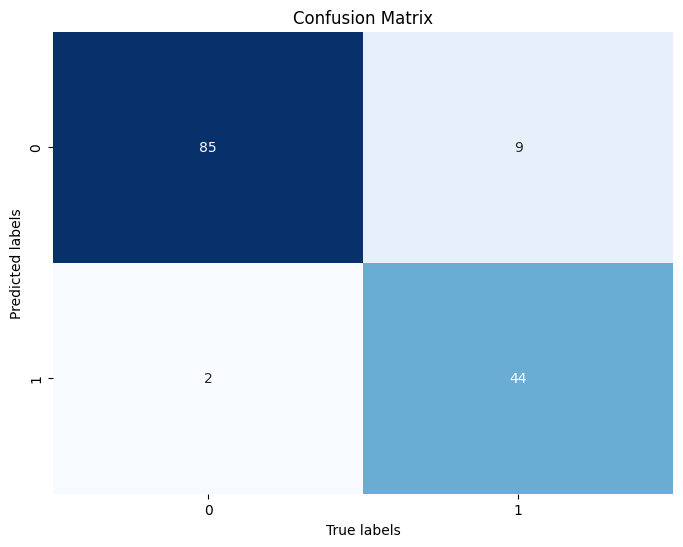

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        94
           1       0.83      0.96      0.89        46

    accuracy                           0.92       140
   macro avg       0.90      0.93      0.91       140
weighted avg       0.93      0.92      0.92       140



In [234]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_test))


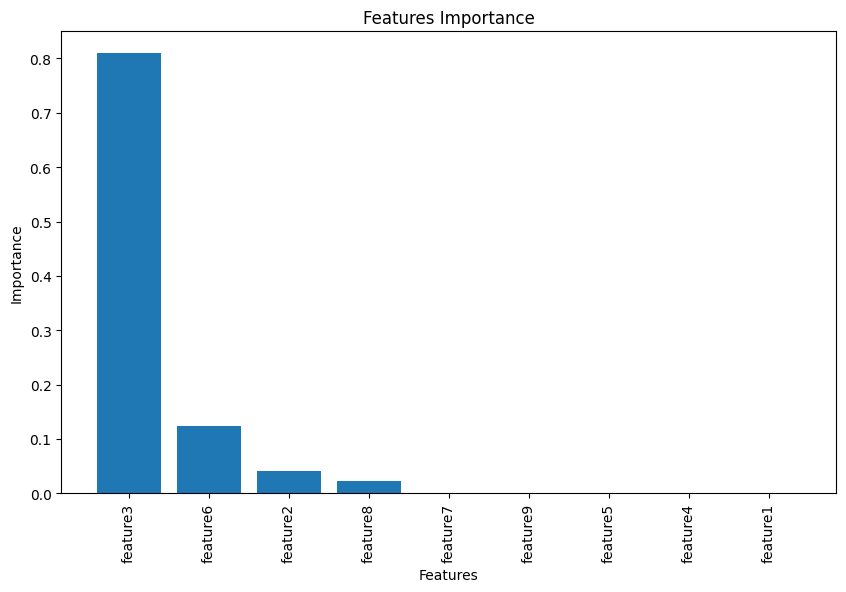

In [235]:
# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Features Importance')
plt.xticks(rotation=90)
plt.show()


KNN CLASSIFICATION


In [236]:
# Define KNN Classifier with a chosen value of k
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN Classifier on the training dataset
knn_classifier.fit(X_train, y_train)

# Predict the labels for the testing dataset
y_pred_test = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier on the testing dataset
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report
print(classification_report(y_test, y_pred_test))

Test Accuracy: 0.9857142857142858
Confusion Matrix:
[[93  1]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.98      0.98      0.98        46

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



In [237]:
# Define the range of hyperparameters to search over
params = {'n_neighbors': np.arange(1, 41)}

# Initialize a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Define evaluation metrics to track during cross-validation
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

# Perform K-Fold Cross Validation to tune hyperparameters and evaluate model performance
results = {}
for k in params['n_neighbors']:
    knn_classifier.set_params(n_neighbors=k)
    cv_results = cross_validate(knn_classifier, X_train, y_train, cv=10, scoring=scoring)
    avg_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}
    results[k] = avg_scores

# Select the best hyperparameters based on the evaluation metrics
best_hyperparameters = max(results, key=lambda k: results[k]['f1'])
print("Best Hyperparameters:", {'n_neighbors': best_hyperparameters})

# Train the model using the best hyperparameters found
best_n_neighbors = {'n_neighbors': best_hyperparameters}
knn_classifier.set_params(**best_n_neighbors)
knn_classifier.fit(X_train, y_train)

# Test the model on the testing dataset
y_pred_test = knn_classifier.predict(X_test)


Best Hyperparameters: {'n_neighbors': 9}


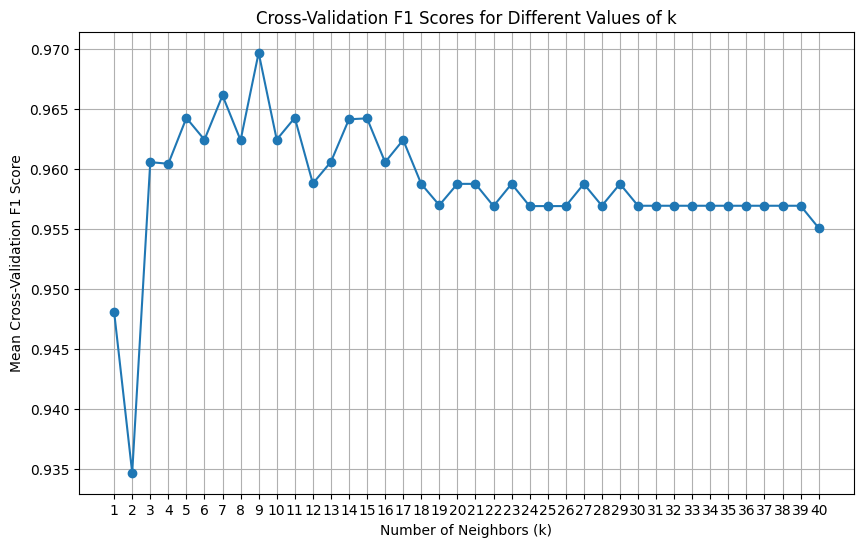

In [238]:
# Extract k values and corresponding cross-validation scores
k_values = list(results.keys())
cv_scores_values = [results[k]['f1'] for k in k_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation F1 Score')
plt.title('Cross-Validation F1 Scores for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()



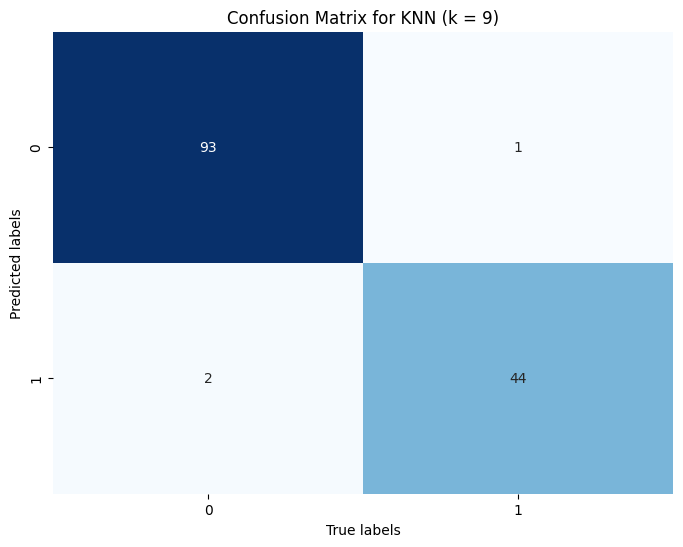

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



In [239]:
# Train KNN Classifier with the best k value
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_hyperparameters)

# Fit the classifier on the entire training dataset
best_knn_classifier.fit(X_train, y_train)

# Predict the labels for the testing dataset
y_pred_test = best_knn_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for KNN (k = {})'.format(best_hyperparameters))
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_test))

SVM CLASSIFICATION


In [240]:
# Define SVM Classifier
svm_classifier = SVC(random_state=42)

# Train the SVM Classifier on the training dataset
svm_classifier.fit(X_train, y_train)

# Predict the labels for the testing dataset
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier on the testing dataset
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report
print(classification_report(y_test, y_pred_test))


Test Accuracy: 0.9642857142857143
Confusion Matrix:
[[91  3]
 [ 2 44]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        94
           1       0.94      0.96      0.95        46

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [241]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.5, 1.0, 10.0, 100.0],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001]
}

# Define SVM Classifier
svm_classifier = SVC(random_state=42)

# Define evaluation metrics to track during cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, scoring=scoring, refit='f1')
grid_search.fit(X_train, y_train)

# Retrieve the results from the grid search
results = grid_search.cv_results_

# Extract hyperparameters and corresponding scores
params = results['params']
mean_test_accuracy = results['mean_test_accuracy']
mean_test_precision = results['mean_test_precision']
mean_test_recall = results['mean_test_recall']
mean_test_f1 = results['mean_test_f1']

# Calculate the average score for each hyperparameter setting
avg_scores = {}
for param, acc, prec, rec, f1 in zip(params, mean_test_accuracy, mean_test_precision, mean_test_recall, mean_test_f1):
    avg_scores[str(param)] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

# Find the hyperparameter setting with the highest average score
best_hyperparameters = max(avg_scores, key=lambda x: avg_scores[x]['f1'])
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


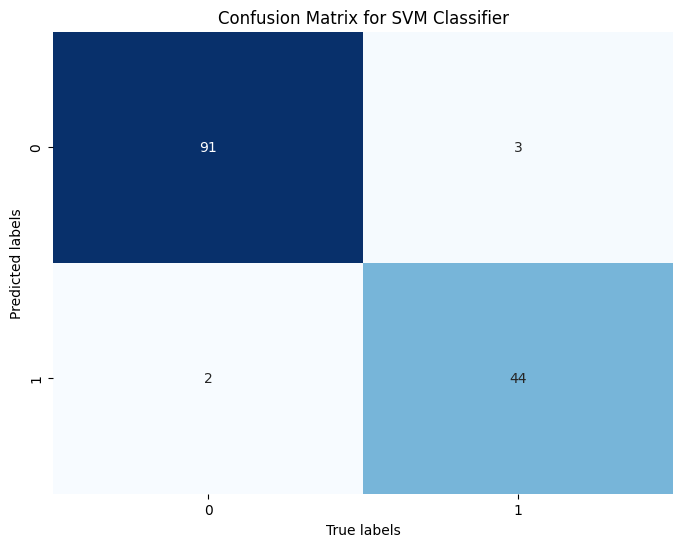

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        94
           1       0.94      0.96      0.95        46

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [242]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_test))

SVM Decision Boundary

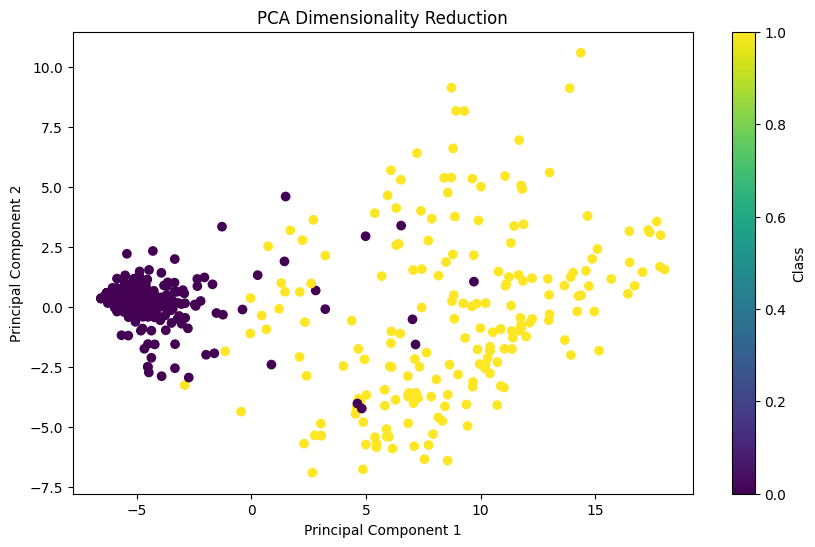

In [243]:
# Initialize PCA with desired number of components
pca = PCA(n_components=2)

# Fit PCA on training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Plot the transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Dimensionality Reduction')
plt.colorbar(label='Class')
plt.show()


In [244]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Initialize SVM classifier
svm_classifier = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and the corresponding mean cross-validation score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


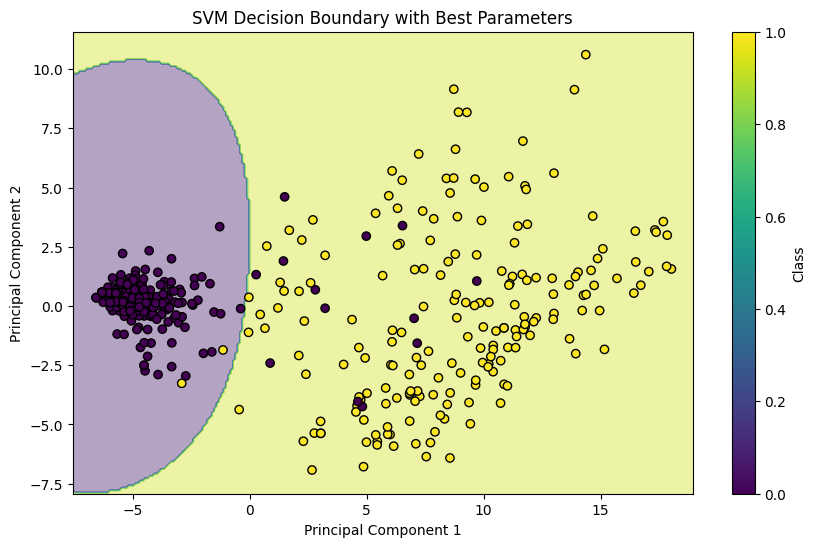

In [245]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = best_params['kernel']

# Initialize SVM classifier with the best parameters
best_svm_classifier = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)

# Train the SVM classifier on the PCA-transformed training data
best_svm_classifier.fit(X_train_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Define meshgrid of feature space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict labels for meshgrid points
Z = best_svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with Best Parameters')
plt.colorbar(label='Class')
plt.show()


Performance Metrics of the 3 Classification Methods

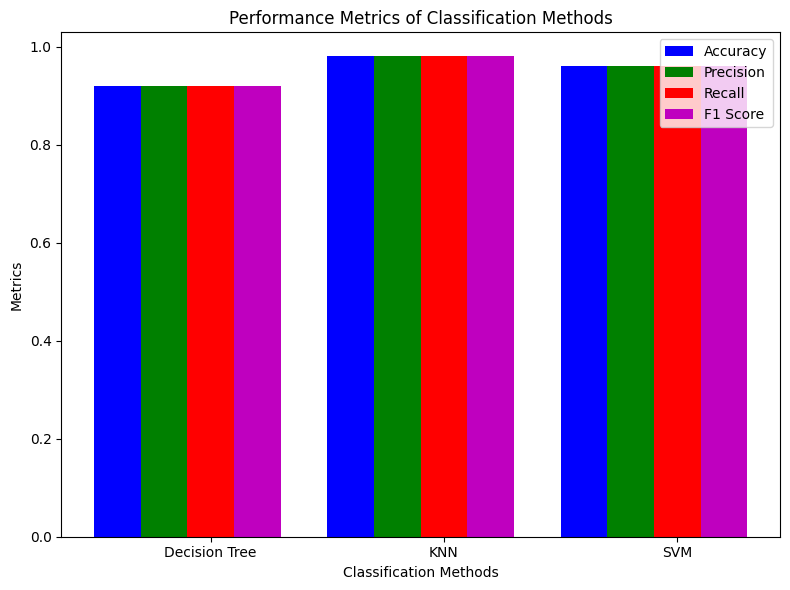

In [246]:
# Define the classification methods
methods = ['Decision Tree', 'KNN', 'SVM']

# Define the performance metrics for each method
accuracy = [0.92, 0.98, 0.96]  # Accuracy scores
precision = [0.92, 0.98, 0.96]  # Precision scores
recall = [0.92, 0.98, 0.96]  # Recall scores
f1_score = [0.92, 0.98, 0.96]  # F1 scores

# Define the positions for each method
x = np.arange(len(methods))

# Set the width of the bars
bar_width = 0.2

# Plotting all metrics on the same chart
plt.figure(figsize=(8, 6))

plt.bar(x - bar_width, accuracy, color='b', width=bar_width, label='Accuracy')
plt.bar(x, precision, color='g', width=bar_width, label='Precision')
plt.bar(x + bar_width, recall, color='r', width=bar_width, label='Recall')
plt.bar(x + 2 * bar_width, f1_score, color='m', width=bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Classification Methods')
plt.ylabel('Metrics')
plt.xticks(x + bar_width, methods)
plt.title('Performance Metrics of Classification Methods')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
